# Features and Targets EDA

This notebook performs exploratory data analysis on the engineered features and targets for the trading strategy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('husl')

## Data Loading

In [ ]:
# Define data paths
features_path = Path('/Volumes/Extreme SSD/trading_data/cex/lookbacks/BINANCE_BTCUSDT.P, 60')
targets_path = Path('/Volumes/Extreme SSD/trading_data/cex/targets/BINANCE_BTCUSDT.P, 60')

# Load features data
features_1h = pd.read_csv(features_path / 'features_1h.csv')
features_multi = pd.read_csv(features_path / 'features_4h12h1d.csv')

# Load targets data
targets = pd.read_csv(targets_path / 'targets_24h.csv')

print(f"Features 1H shape: {features_1h.shape}")
print(f"Features Multi-TF shape: {features_multi.shape}")
print(f"Targets shape: {targets.shape}")

Features 1H shape: (22917, 90)
Features Multi-TF shape: (22917, 268)
Targets shape: (22917, 43)


## Data Overview

In [3]:
# Display basic info about each dataset
print("=== Features 1H Dataset ===")
print(features_1h.info())
print("\nFirst few columns:")
print(features_1h.columns[:10].tolist())
print(f"\nDate range: {features_1h['timestamp'].min()} to {features_1h['timestamp'].max()}" if 'timestamp' in features_1h.columns else "No timestamp column found")

=== Features 1H Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22917 entries, 0 to 22916
Data columns (total 90 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   timestamp                           22917 non-null  object 
 1   close_open_diff_current_1H          22917 non-null  float64
 2   high_low_range_current_1H           22917 non-null  float64
 3   close_change_current_1H             22916 non-null  float64
 4   log_close_1H                        22917 non-null  float64
 5   close_pct_change_current_1H         22916 non-null  float64
 6   close_cum_return_5_1H               22912 non-null  float64
 7   close_cum_return_10_1H              22907 non-null  float64
 8   close_cum_return_20_1H              22897 non-null  float64
 9   close_zscore_20_1H                  22898 non-null  float64
 10  close_sma_20_1H                     22898 non-null  float64
 11  close_ema_12_

In [4]:
print("=== Features Multi-Timeframe Dataset ===")
print(features_multi.info())
print("\nFirst few columns:")
print(features_multi.columns[:10].tolist())
print(f"\nDate range: {features_multi['timestamp'].min()} to {features_multi['timestamp'].max()}" if 'timestamp' in features_multi.columns else "No timestamp column found")

=== Features Multi-Timeframe Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22917 entries, 0 to 22916
Columns: 268 entries, timestamp to close_spectral_entropy_50_1D
dtypes: float64(255), int64(12), object(1)
memory usage: 46.9+ MB
None

First few columns:
['timestamp', 'close_open_diff_current_4H', 'high_low_range_current_4H', 'close_change_current_4H', 'log_close_4H', 'close_pct_change_current_4H', 'close_cum_return_5_4H', 'close_cum_return_10_4H', 'close_cum_return_20_4H', 'close_zscore_20_4H']

Date range: 2023-01-01 00:00:00+00:00 to 2025-08-12 20:00:00+00:00


In [20]:
print("=== Targets Dataset ===")
print(targets.info())
print("\nColumns:")
print(targets.columns.tolist())
print(f"\nDate range: {targets['timestamp'].min()} to {targets['timestamp'].max()}" if 'timestamp' in targets.columns else "No timestamp column found")

=== Targets Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22917 entries, 0 to 22916
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        22917 non-null  object 
 1   y_logret_24h                     22893 non-null  float64
 2   y_mfe_24h                        22893 non-null  float64
 3   y_mae_24h                        22893 non-null  float64
 4   y_tb_label_u0.15_d0.05_24h       22893 non-null  float64
 5   y_tp_before_sl_u0.15_d0.05_24h   22893 non-null  float64
 6   y_tb_label_u0.1_d0.05_24h        22893 non-null  float64
 7   y_tp_before_sl_u0.1_d0.05_24h    22893 non-null  float64
 8   y_logret_48h                     22869 non-null  float64
 9   y_mfe_48h                        22869 non-null  float64
 10  y_mae_48h                        22869 non-null  float64
 11  y_tb_label_u0.15_d0.05_48h       22869 non-null  float64

## Data Quality Assessment

In [6]:
# Check for missing values
print("=== Missing Values Analysis ===")
print("\nFeatures 1H missing values:")
missing_1h = features_1h.isnull().sum()
print(missing_1h[missing_1h > 0].sort_values(ascending=False))

print("\nFeatures Multi-TF missing values:")
missing_multi = features_multi.isnull().sum()
print(missing_multi[missing_multi > 0].sort_values(ascending=False))

print("\nTargets missing values:")
missing_targets = targets.isnull().sum()
print(missing_targets[missing_targets > 0].sort_values(ascending=False))

=== Missing Values Analysis ===

Features 1H missing values:
close_roll_spread_20_1H        7566
close_ou_halflife_100_1H       1407
close_ljung_p_5_100_1H          100
close_hurst_100_1H               99
close_vol_ratio_5_50_1H          50
                               ... 
close_cum_return_10_1H           10
close_cum_return_5_1H             5
close_pct_change_current_1H       1
close_obv_1H                      1
close_change_current_1H           1
Length: 74, dtype: int64

Features Multi-TF missing values:
close_spectral_entropy_50_1D    22917
close_ou_halflife_100_12H       22917
close_vol_ratio_5_50_1D         22917
close_skew_30_1D                22917
close_kurt_30_1D                22917
                                ...  
close_pct_change_current_12H       12
close_obv_12H                      12
close_obv_4H                        4
close_pct_change_current_4H         4
close_change_current_4H             4
Length: 222, dtype: int64

Targets missing values:
y_tp_before_sl

In [8]:
# Convert timestamp columns to datetime if they exist
for df, name in [(features_1h, 'features_1h'), (features_multi, 'features_multi'), (targets, 'targets')]:
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        print(f"{name} timestamp converted to datetime")

features_1h timestamp converted to datetime
features_multi timestamp converted to datetime


## Missing Values Analysis Based on Lookback Windows

The lookback window system works as follows:
- **Lookback window**: 720 bars of 1H data
- **Expected missing values**: First 720 rows (indices 0-719) should have missing values since they don't have enough lookback data
- **Complete data**: Only rows from index 720 onwards should have complete features

However, some features may require more data than others:
- **1H features**: Can be calculated with 720 rows of 1H data
- **4H features**: Need enough 4H bars (720/4 = 180 bars)
- **12H features**: Need enough 12H bars (720/12 = 60 bars)  
- **1D features**: Need enough 1D bars (720/24 = 30 bars)

Let's analyze which features have more missing values than expected.

## Missing Values Analysis Based on Lookback Windows

Given that features are generated using a 720-bar lookback window from 1H data:
- **1H features**: Need 720 rows of 1H data
- **4H features**: Need 720/4 = 180 rows of 4H data
- **12H features**: Need 720/12 = 60 rows of 12H data
- **1D features**: Need 720/24 = 30 rows of 1D data

Let's identify features with excessive missing values beyond these expected thresholds.

In [7]:
# Analyze missing values AFTER the initial 720-row lookback period
# Only look at rows from index 720 onwards where features should have complete data

print("=== Missing Values Analysis After Lookback Period ===")
print(f"Total dataset: {len(features_1h)} rows")
print(f"Analyzing rows {720} onwards ({len(features_1h) - 720} rows)")

# Filter to only analyze the period after initial lookback
analysis_period = slice(720, None)

# Check missing values in the analysis period for 1H features
features_1h_analysis = features_1h.iloc[analysis_period]
missing_1h_analysis = features_1h_analysis.isnull().sum()
missing_1h_analysis = missing_1h_analysis[missing_1h_analysis > 0].sort_values(ascending=False)

print(f"\n1H Features with missing values AFTER row 720:")
if len(missing_1h_analysis) > 0:
    print(f"🚨 Found {len(missing_1h_analysis)} features still missing data in analysis period:")
    for feature, missing_count in missing_1h_analysis.items():
        percentage = (missing_count / len(features_1h_analysis)) * 100
        print(f"  {feature}: {missing_count} missing ({percentage:.1f}% of analysis period)")
else:
    print("✅ All 1H features have complete data after the lookback period")

=== Missing Values Analysis After Lookback Period ===
Total dataset: 22917 rows
Analyzing rows 720 onwards (22197 rows)

1H Features with missing values AFTER row 720:
🚨 Found 2 features still missing data in analysis period:
  close_roll_spread_20_1H: 7347 missing (33.1% of analysis period)
  close_ou_halflife_100_1H: 1209 missing (5.4% of analysis period)


In [8]:
# Analyze features based on their requirements from the documentation
def get_feature_expectation(feature_name):
    """
    Determine expected missing values based on feature name and requirements
    """
    # Features requiring large lookback windows (from the docs)
    if 'hurst_100' in feature_name:
        return 100  # Hurst requires 100 periods
    elif 'ljung_p_5_100' in feature_name:
        return 100  # Ljung-Box test with 100-period window
    elif 'ou_halflife_100' in feature_name:
        return 100  # OU half-life with 100 periods
    elif 'spectral_entropy_50' in feature_name:
        return 50   # Spectral entropy with 50 periods
    elif 'dominant_cycle_length_50' in feature_name or 'cycle_strength_50' in feature_name:
        return 50   # Cycle analysis with 50 periods
    elif 'vol_ratio_5_50' in feature_name or 'var_5_50' in feature_name or 'cvar_5_50' in feature_name:
        return 50   # Features comparing 5 vs 50 period windows
    elif 'skew_30' in feature_name or 'kurt_30' in feature_name or 'autocorr_1_30' in feature_name:
        return 30   # 30-period statistical features
    elif 'uo_7_14_28' in feature_name:
        return 28   # Ultimate Oscillator uses up to 28 periods
    elif any(x in feature_name for x in ['_20_', '_sma_20', '_bb_', '_atr_14', '_rsi_14', '_cci_20']):
        # Standard TA indicators with their typical periods
        if '_20_' in feature_name or '_sma_20' in feature_name or '_bb_' in feature_name or '_cci_20' in feature_name:
            return 20
        elif '_14_' in feature_name or '_atr_14' in feature_name or '_rsi_14' in feature_name:
            return 14
    # Basic features should work with minimal requirements
    return 1

print("=== Feature-Specific Missing Value Analysis ===")

# Analyze each feature's missing values against its expected requirement
problematic_features = {}

for feature in features_1h_analysis.columns:
    if feature == 'timestamp':
        continue
        
    missing_count = missing_1h_analysis.get(feature, 0)
    expected_missing = get_feature_expectation(feature)
    
    if missing_count > expected_missing:
        problematic_features[feature] = {
            'missing': missing_count,
            'expected': expected_missing,
            'excess': missing_count - expected_missing
        }

if problematic_features:
    print(f"🚨 Found {len(problematic_features)} features with MORE missing values than expected:")
    
    # Sort by excess missing values
    sorted_problematic = sorted(problematic_features.items(), 
                               key=lambda x: x[1]['excess'], reverse=True)
    
    for feature, info in sorted_problematic:
        print(f"  {feature}:")
        print(f"    - Missing: {info['missing']} values")
        print(f"    - Expected: ≤{info['expected']} values") 
        print(f"    - Excess: {info['excess']} values")
        
else:
    print("✅ All features have missing values within expected ranges!")

print(f"\n📊 Summary:")
print(f"- Total features analyzed: {len(features_1h_analysis.columns) - 1}")  # -1 for timestamp
print(f"- Features with any missing values: {len(missing_1h_analysis)}")
print(f"- Features with excessive missing values: {len(problematic_features)}")
print(f"- Analysis period: {len(features_1h_analysis)} rows")

=== Feature-Specific Missing Value Analysis ===
🚨 Found 2 features with MORE missing values than expected:
  close_roll_spread_20_1H:
    - Missing: 7347 values
    - Expected: ≤20 values
    - Excess: 7327 values
  close_ou_halflife_100_1H:
    - Missing: 1209 values
    - Expected: ≤100 values
    - Excess: 1109 values

📊 Summary:
- Total features analyzed: 89
- Features with any missing values: 2
- Features with excessive missing values: 2
- Analysis period: 22197 rows


In [9]:
# Multi-timeframe analysis with proper expectations
print("=== Multi-Timeframe Features Analysis ===")

features_multi_analysis = features_multi.iloc[analysis_period]
missing_multi_analysis = features_multi_analysis.isnull().sum()
missing_multi_analysis = missing_multi_analysis[missing_multi_analysis > 0].sort_values(ascending=False)

def analyze_timeframe_features(timeframe_suffix, available_bars_in_lookback):
    """Analyze features for a specific timeframe"""
    print(f"\n--- {timeframe_suffix} Features ---")
    print(f"Available {timeframe_suffix} bars in 720-bar lookback: {available_bars_in_lookback}")
    
    # Get features for this timeframe
    tf_features = [col for col in features_multi_analysis.columns 
                   if col.endswith(f'_{timeframe_suffix}') and col != 'timestamp']
    
    if not tf_features:
        print(f"No {timeframe_suffix} features found")
        return
    
    print(f"Total {timeframe_suffix} features: {len(tf_features)}")
    
    # Check missing values for this timeframe
    tf_missing = {}
    tf_problematic = {}
    
    for feature in tf_features:
        missing_count = missing_multi_analysis.get(feature, 0)
        expected_missing = get_feature_expectation(feature)
        
        if missing_count > 0:
            tf_missing[feature] = missing_count
            
        # Adjust expectation based on available bars
        # If feature needs more bars than available in timeframe, expect more missing
        if expected_missing > available_bars_in_lookback:
            expected_missing = len(features_multi_analysis)  # Expect completely missing
            
        if missing_count > expected_missing:
            tf_problematic[feature] = {
                'missing': missing_count,
                'expected': expected_missing,
                'excess': missing_count - expected_missing
            }
    
    if tf_missing:
        print(f"Features with missing values: {len(tf_missing)}")
        
        # Check for completely missing features
        completely_missing = {k: v for k, v in tf_missing.items() 
                            if v == len(features_multi_analysis)}
        
        if completely_missing:
            print(f"🚨 Completely missing {timeframe_suffix} features ({len(completely_missing)}):")
            for feature in completely_missing.keys():
                expected = get_feature_expectation(feature)
                if expected > available_bars_in_lookback:
                    print(f"  ✅ {feature} (expected - needs {expected} bars, only {available_bars_in_lookback} available)")
                else:
                    print(f"  🚨 {feature} (unexpected - should work with {expected} bars)")
    
    if tf_problematic:
        print(f"🚨 Problematic {timeframe_suffix} features ({len(tf_problematic)}):")
        for feature, info in sorted(tf_problematic.items(), key=lambda x: x[1]['excess'], reverse=True):
            print(f"  {feature}: {info['missing']} missing (expected ≤{info['expected']})")
    elif tf_missing:
        print(f"✅ All {timeframe_suffix} features have expected missing patterns")
    else:
        print(f"✅ No {timeframe_suffix} features have missing values")

# Analyze each timeframe
analyze_timeframe_features('4H', 180)   # 720/4 = 180
analyze_timeframe_features('12H', 60)   # 720/12 = 60  
analyze_timeframe_features('1D', 30)    # 720/24 = 30

=== Multi-Timeframe Features Analysis ===

--- 4H Features ---
Available 4H bars in 720-bar lookback: 180
Total 4H features: 89
Features with missing values: 2
🚨 Problematic 4H features (2):
  close_roll_spread_20_4H: 7208 missing (expected ≤20)
  close_ou_halflife_100_4H: 1480 missing (expected ≤100)

--- 12H Features ---
Available 12H bars in 720-bar lookback: 60
Total 12H features: 89
Features with missing values: 4
🚨 Completely missing 12H features (3):
  ✅ close_hurst_100_12H (expected - needs 100 bars, only 60 available)
  ✅ close_ljung_p_5_100_12H (expected - needs 100 bars, only 60 available)
  ✅ close_ou_halflife_100_12H (expected - needs 100 bars, only 60 available)
🚨 Problematic 12H features (1):
  close_roll_spread_20_12H: 8652 missing (expected ≤20)

--- 1D Features ---
Available 1D bars in 720-bar lookback: 30
Total 1D features: 89
Features with missing values: 13
🚨 Completely missing 1D features (12):
  ✅ close_vol_ratio_5_50_1D (expected - needs 50 bars, only 30 availab

# features to remove

- close_roll_spread_20_1H
- close_ou_halflife_100_1H
- close_roll_spread_20_4H: 7208 missing (expected ≤20)
- close_ou_halflife_100_4H: 1480 missing (expected ≤100)
- close_hurst_100_12H (expected - needs 100 bars, only 60 available)
- close_ljung_p_5_100_12H (expected - needs 100 bars, only 60 available)
- close_ou_halflife_100_12H (expected - needs 100 bars, only 60 available)
- close_roll_spread_20_12H: 8652 missing (expected ≤20)
- close_vol_ratio_5_50_1D (expected - needs 50 bars, only 30 available)
- close_skew_30_1D (unexpected - should work with 30 bars)
- close_kurt_30_1D (unexpected - should work with 30 bars)
- close_autocorr_1_30_1D (unexpected - should work with 30 bars)
- close_hurst_100_1D (expected - needs 100 bars, only 30 available)
- close_dominant_cycle_length_50_1D (expected - needs 50 bars, only 30 available)
- close_cycle_strength_50_1D (expected - needs 50 bars, only 30 available)
- close_ljung_p_5_100_1D (expected - needs 100 bars, only 30 available)
- close_ou_halflife_100_1D (expected - needs 100 bars, only 30 available)
- close_var_5_50_1D (expected - needs 50 bars, only 30 available)
- close_cvar_5_50_1D (expected - needs 50 bars, only 30 available)
- close_spectral_entropy_50_1D (expected - needs 50 bars, only 30 available)
- close_skew_30_1D: 22197 missing (expected ≤30)
- close_kurt_30_1D: 22197 missing (expected ≤30)
- close_autocorr_1_30_1D: 22197 missing (expected ≤30)
- close_roll_spread_20_1D: 7029 missing (expected ≤20)

## Data Cleaning Based on Missing Value Analysis

Based on the missing value analysis, we'll clean the datasets by:
1. Removing the first 720 rows (insufficient lookback data)
2. Removing features with excessive missing values
3. Removing any remaining rows with missing values

In [10]:
# Data cleaning function
def clean_feature_dataset(df, dataset_name, lookback_rows=720):
    """
    Clean feature dataset by removing problematic features and rows
    """
    print(f"=== Cleaning {dataset_name} ===")
    print(f"Original shape: {df.shape}")
    
    # Step 1: Remove first 720 rows (insufficient lookback data)
    df_cleaned = df.iloc[lookback_rows:].copy()
    print(f"After removing first {lookback_rows} rows: {df_cleaned.shape}")
    
    # Step 2: Identify and remove features with excessive missing values
    missing_analysis = df_cleaned.isnull().sum()
    missing_features = missing_analysis[missing_analysis > 0].sort_values(ascending=False)
    
    # Features to remove based on excessive missing values
    features_to_remove = [
    "close_roll_spread_20_1H",
    "close_ou_halflife_100_1H"
]
    # Remove problematic features
    if features_to_remove:
        df_cleaned = df_cleaned.drop(columns=features_to_remove)
        print(f"\\nRemoved {len(features_to_remove)} problematic features")
        print(f"Shape after removing features: {df_cleaned.shape}")
    else:
        print("\\nNo features need to be removed")
    
    # Step 3: Remove rows with any remaining missing values
    rows_before_final_clean = len(df_cleaned)
    df_cleaned = df_cleaned.dropna()
    rows_after_final_clean = len(df_cleaned)
    rows_removed_final = rows_before_final_clean - rows_after_final_clean
    
    print(f"\\nFinal cleaning - removing rows with any missing values:")
    print(f"  Rows before: {rows_before_final_clean}")
    print(f"  Rows after: {rows_after_final_clean}")
    print(f"  Rows removed: {rows_removed_final}")
    
    # Summary
    original_rows = len(df)
    final_rows = len(df_cleaned)
    total_rows_removed = original_rows - final_rows
    
    print(f"\\n📊 {dataset_name} Cleaning Summary:")
    print(f"  Original: {df.shape}")
    print(f"  Final: {df_cleaned.shape}")
    print(f"  Total rows removed: {total_rows_removed} ({(total_rows_removed/original_rows)*100:.1f}%)")
    print(f"  Features removed: {len(features_to_remove)}")
    
    return df_cleaned

# Clean features_1h dataset
features_1h_clean = clean_feature_dataset(features_1h, "features_1h")

=== Cleaning features_1h ===
Original shape: (22917, 90)
After removing first 720 rows: (22197, 90)
\nRemoved 2 problematic features
Shape after removing features: (22197, 88)
\nFinal cleaning - removing rows with any missing values:
  Rows before: 22197
  Rows after: 22197
  Rows removed: 0
\n📊 features_1h Cleaning Summary:
  Original: (22917, 90)
  Final: (22197, 88)
  Total rows removed: 720 (3.1%)
  Features removed: 2


In [16]:
# Clean features_multi dataset with special handling for timeframes
def clean_multi_timeframe_dataset(df, dataset_name, lookback_rows=720):
    """
    Clean multi-timeframe dataset with special handling for different timeframes
    """
    print(f"=== Cleaning {dataset_name} ===")
    print(f"Original shape: {df.shape}")
    
    # Step 1: Remove first 720 rows
    df_cleaned = df.iloc[lookback_rows:].copy()
    print(f"After removing first {lookback_rows} rows: {df_cleaned.shape}")
    
    # Step 2: Analyze features by timeframe and remove problematic ones
    missing_analysis = df_cleaned.isnull().sum()
    missing_features = missing_analysis[missing_analysis > 0].sort_values(ascending=False)
    
    features_to_remove = [
    "close_roll_spread_20_4H",
    "close_ou_halflife_100_4H",
    "close_hurst_100_12H",
    "close_ljung_p_5_100_12H",
    "close_ou_halflife_100_12H",
    "close_roll_spread_20_12H",
    "close_vol_ratio_5_50_1D",
    "close_skew_30_1D",
    "close_kurt_30_1D",
    "close_autocorr_1_30_1D",
    "close_hurst_100_1D",
    "close_dominant_cycle_length_50_1D",
    "close_cycle_strength_50_1D",
    "close_ljung_p_5_100_1D",
    "close_ou_halflife_100_1D",
    "close_var_5_50_1D",
    "close_cvar_5_50_1D",
    "close_spectral_entropy_50_1D",
    "close_roll_spread_20_1D"
]
    
    # Remove problematic features
    if features_to_remove:
        df_cleaned = df_cleaned.drop(columns=features_to_remove)
        print(f"\\nRemoved {len(features_to_remove)} problematic features")
        print(f"Shape after removing features: {df_cleaned.shape}")
    else:
        print("\\nNo features need to be removed")
    
    # Step 3: Remove rows with any remaining missing values
    rows_before_final_clean = len(df_cleaned)
    df_cleaned = df_cleaned.dropna()
    rows_after_final_clean = len(df_cleaned)
    rows_removed_final = rows_before_final_clean - rows_after_final_clean
    
    print(f"\\nFinal cleaning - removing rows with any missing values:")
    print(f"  Rows before: {rows_before_final_clean}")
    print(f"  Rows after: {rows_after_final_clean}")
    print(f"  Rows removed: {rows_removed_final}")
    
    # Summary
    original_rows = len(df)
    final_rows = len(df_cleaned)
    total_rows_removed = original_rows - final_rows
    
    print(f"\\n📊 {dataset_name} Cleaning Summary:")
    print(f"  Original: {df.shape}")
    print(f"  Final: {df_cleaned.shape}")
    print(f"  Total rows removed: {total_rows_removed} ({(total_rows_removed/original_rows)*100:.1f}%)")
    print(f"  Features removed: {len(features_to_remove)}")
    
    return df_cleaned

# Clean features_multi dataset
features_multi_clean = clean_multi_timeframe_dataset(features_multi, "features_multi")

=== Cleaning features_multi ===
Original shape: (22917, 268)
After removing first 720 rows: (22197, 268)
\nRemoved 19 problematic features
Shape after removing features: (22197, 249)
\nFinal cleaning - removing rows with any missing values:
  Rows before: 22197
  Rows after: 22197
  Rows removed: 0
\n📊 features_multi Cleaning Summary:
  Original: (22917, 268)
  Final: (22197, 249)
  Total rows removed: 720 (3.1%)
  Features removed: 19


In [17]:
# Final summary and verification
print("=== FINAL CLEANING SUMMARY ===")
print(f"\\nDataset transformations:")
print(f"Features 1H:")
print(f"  {features_1h.shape} → {features_1h_clean.shape}")
print(f"  Data reduction: {((len(features_1h) - len(features_1h_clean)) / len(features_1h) * 100):.1f}%")

print(f"\\nFeatures Multi-TF:")
print(f"  {features_multi.shape} → {features_multi_clean.shape}")
print(f"  Data reduction: {((len(features_multi) - len(features_multi_clean)) / len(features_multi) * 100):.1f}%")

# Verify no missing values remain
print(f"\\nMissing values verification:")
print(f"Features 1H missing values: {features_1h_clean.isnull().sum().sum()}")
print(f"Features Multi-TF missing values: {features_multi_clean.isnull().sum().sum()}")


print(f"\\n✅ Data cleaning completed!")
print(f"✅ All cleaned datasets have no missing values")
print(f"✅ Ready for modeling and analysis")

=== FINAL CLEANING SUMMARY ===
\nDataset transformations:
Features 1H:
  (22917, 90) → (22197, 88)
  Data reduction: 3.1%
\nFeatures Multi-TF:
  (22917, 268) → (22197, 249)
  Data reduction: 3.1%
\nMissing values verification:
Features 1H missing values: 0
Features Multi-TF missing values: 0
\n✅ Data cleaning completed!
✅ All cleaned datasets have no missing values
✅ Ready for modeling and analysis


## Features Analysis

In [9]:
# Analyze features 1H dataset
print("=== Features 1H Statistical Summary ===")
numeric_cols_1h = features_1h.select_dtypes(include=[np.number]).columns
print(features_1h[numeric_cols_1h].describe())

=== Features 1H Statistical Summary ===
       close_open_diff_current_1H  high_low_range_current_1H  \
count                22917.000000               22917.000000   
mean                     4.490038                 416.268438   
std                    337.400811                 418.816279   
min                  -4410.000000                   4.400000   
25%                    -97.100000                 150.500000   
50%                      2.800000                 300.700000   
75%                    110.000000                 533.600000   
max                   5223.800000                8905.000000   

       close_change_current_1H  log_close_1H  close_pct_change_current_1H  \
count             22916.000000  22917.000000                 22916.000000   
mean                  4.496727     10.858212                     0.009926   
std                 337.411287      0.541810                     0.507919   
min               -4409.900000      9.711370                    -6.258429  

In [10]:
# Analyze features multi-timeframe dataset
print("=== Features Multi-TF Statistical Summary ===")
numeric_cols_multi = features_multi.select_dtypes(include=[np.number]).columns
print(features_multi[numeric_cols_multi].describe())

=== Features Multi-TF Statistical Summary ===
       close_open_diff_current_4H  high_low_range_current_4H  \
count                22917.000000               22917.000000   
mean                    17.985797                 856.123297   
std                    671.068522                 806.251440   
min                  -6521.900000                  22.400000   
25%                   -179.300000                 323.000000   
50%                      4.400000                 630.000000   
75%                    221.100000                1094.100000   
max                   6136.700000                9342.900000   

       close_change_current_4H  log_close_4H  close_pct_change_current_4H  \
count             22913.000000  22917.000000                 22913.000000   
mean                 17.993755     10.858065                     0.039755   
std                 671.131021      0.541788                     1.020624   
min               -6521.800000      9.711370                    -8.33

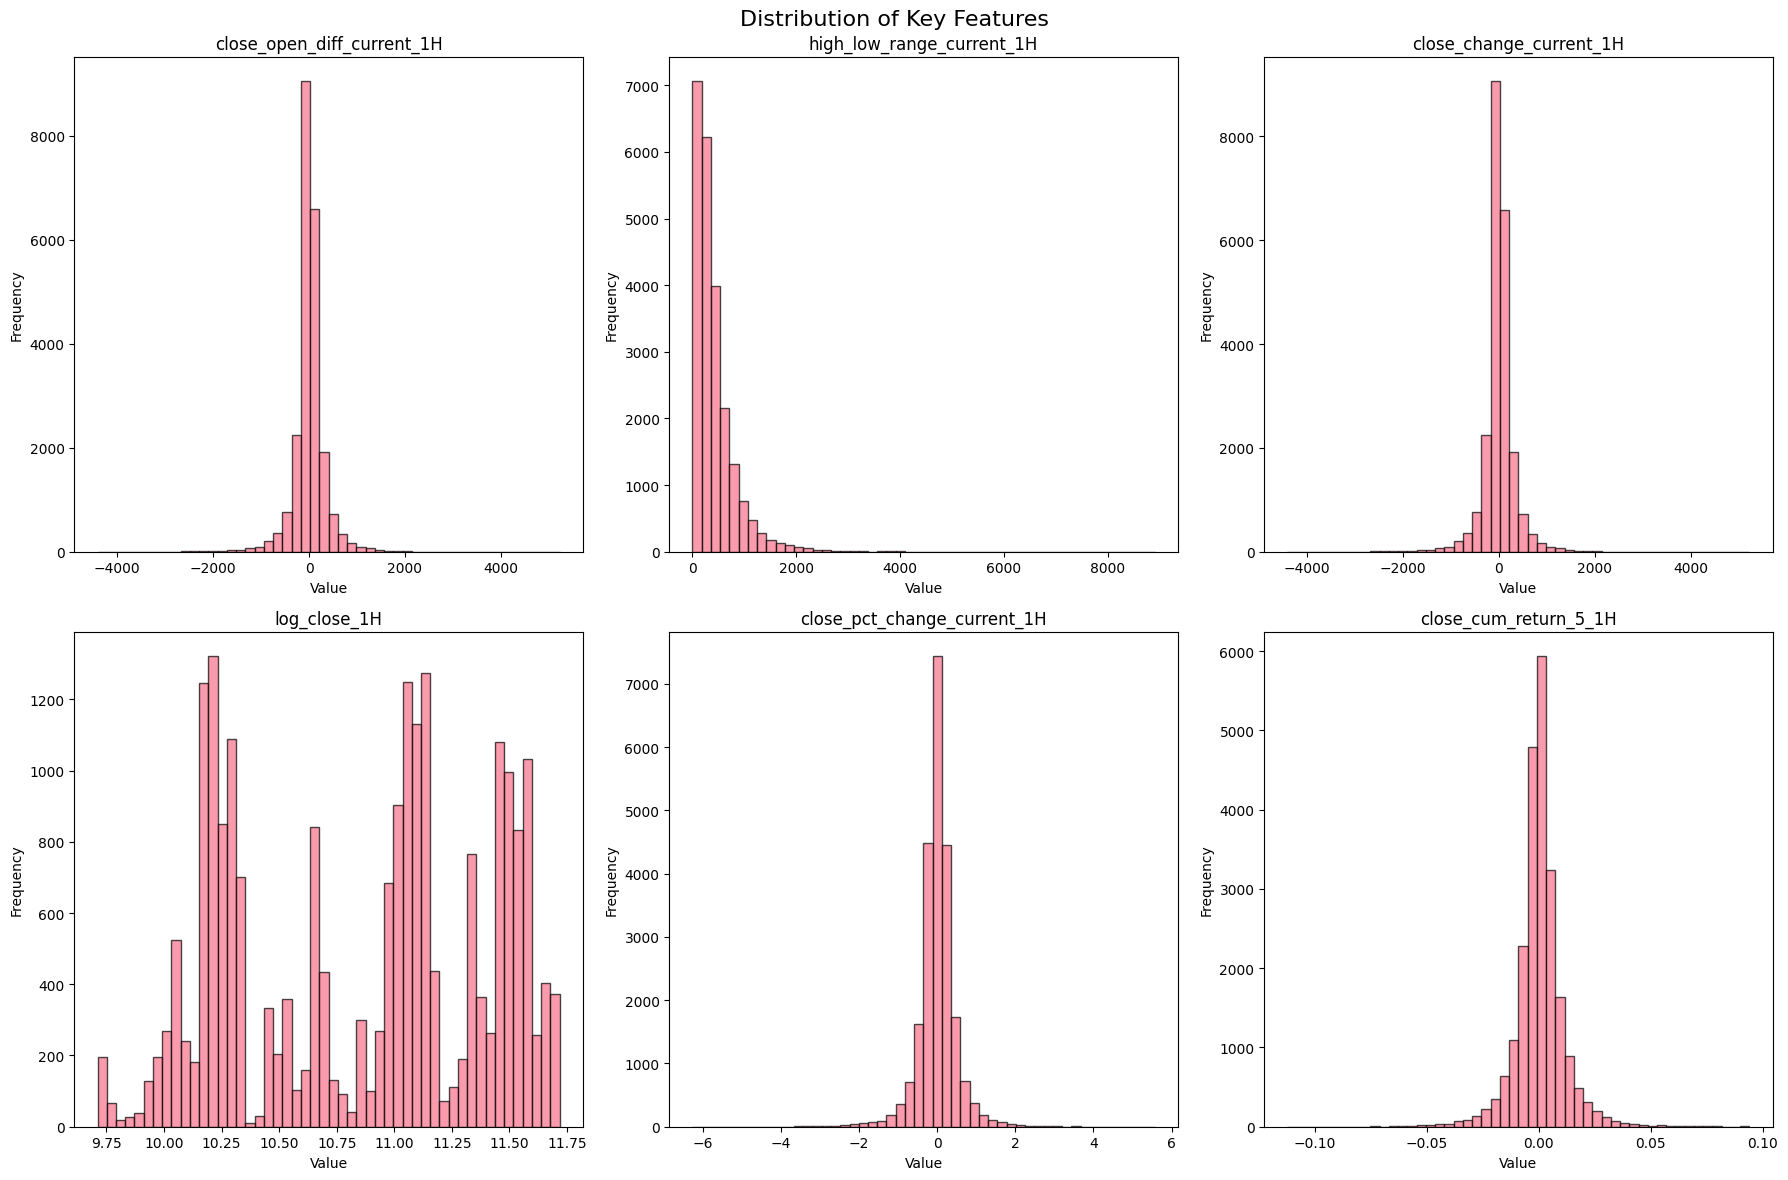

In [11]:
# Plot distribution of key features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Key Features', fontsize=16)

# Plot first 6 numeric columns from features_1h
for i, col in enumerate(numeric_cols_1h[:6]):
    row, col_idx = divmod(i, 3)
    axes[row, col_idx].hist(features_1h[col].dropna(), bins=50, alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].set_xlabel('Value')
    axes[row, col_idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Targets Analysis

In [21]:
# Analyze targets dataset
print("=== Targets Statistical Summary ===")
numeric_targets = targets.select_dtypes(include=[np.number]).columns
print(targets[numeric_targets].describe())

=== Targets Statistical Summary ===
       y_logret_24h     y_mfe_24h     y_mae_24h  y_tb_label_u0.15_d0.05_24h  \
count  22893.000000  22893.000000  22893.000000                22893.000000   
mean       0.002068      0.019559     -0.017865                   -0.059145   
std        0.024585      0.020444      0.018759                    0.241573   
min       -0.203584     -0.000004     -0.198978                   -1.000000   
25%       -0.009856      0.006153     -0.024091                    0.000000   
50%        0.001024      0.013153     -0.012154                    0.000000   
75%        0.013034      0.026135     -0.005370                    0.000000   
max        0.165451      0.204901      0.000027                    1.000000   

       y_tp_before_sl_u0.15_d0.05_24h  y_tb_label_u0.1_d0.05_24h  \
count                    22893.000000               22893.000000   
mean                         0.001354                  -0.050277   
std                          0.036774           

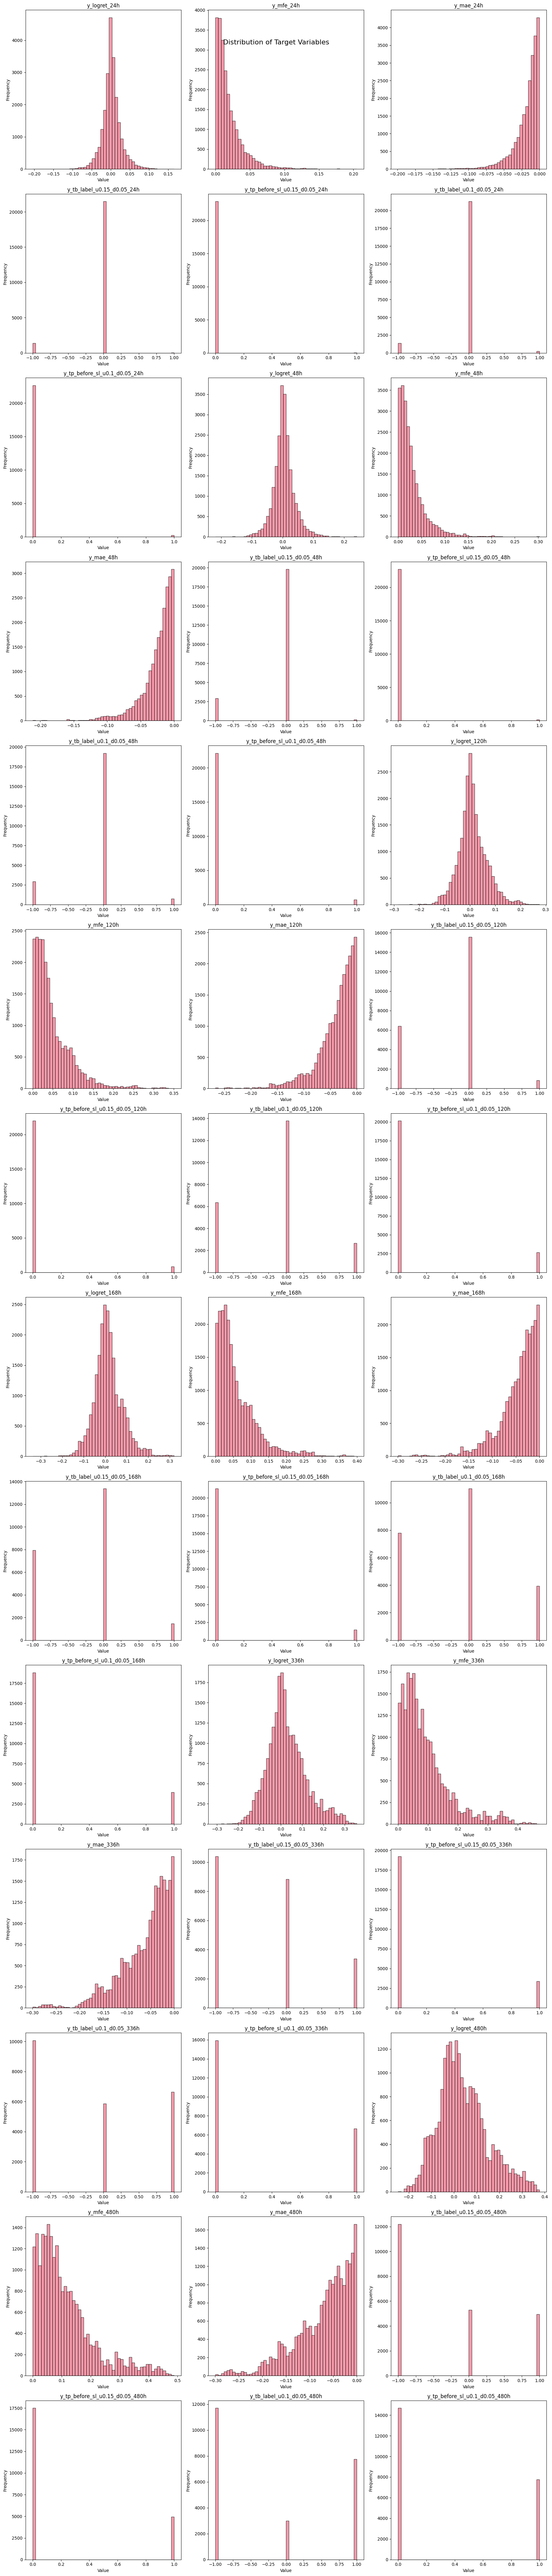

In [22]:
# Plot target variables distribution
target_cols = [col for col in targets.columns if col != 'timestamp']
n_targets = len(target_cols)

if n_targets > 0:
    n_rows = (n_targets + 2) // 3
    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6*n_rows))
    fig.suptitle('Distribution of Target Variables', fontsize=16)
    
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    for i, col in enumerate(target_cols):
        row, col_idx = divmod(i, 3)
        if n_targets == 1:
            ax = axes[col_idx]
        else:
            ax = axes[row, col_idx]
        
        ax.hist(targets[col].dropna(), bins=50, alpha=0.7, edgecolor='black')
        ax.set_title(f'{col}')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
    
    # Hide empty subplots
    for i in range(n_targets, n_rows * 3):
        row, col_idx = divmod(i, 3)
        axes[row, col_idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

## Data Alignment and Merging

In [ ]:
# Check if we can merge the datasets based on timestamp
if 'timestamp' in features_1h.columns and 'timestamp' in targets.columns:
    # Merge features_1h with targets
    merged_1h = pd.merge(features_1h, targets, on='timestamp', how='inner')
    print(f"Merged 1H features + targets shape: {merged_1h.shape}")
    print(f"Data coverage: {len(merged_1h) / len(features_1h) * 100:.2f}% of original features")
    
if 'timestamp' in features_multi.columns and 'timestamp' in targets.columns:
    # Merge features_multi with targets
    merged_multi = pd.merge(features_multi, targets, on='timestamp', how='inner')
    print(f"Merged Multi-TF features + targets shape: {merged_multi.shape}")
    print(f"Data coverage: {len(merged_multi) / len(features_multi) * 100:.2f}% of original features")

## Correlation Analysis

In [ ]:
# Correlation analysis between features and targets (using merged_1h if available)
if 'merged_1h' in locals():
    # Calculate correlation matrix
    numeric_merged = merged_1h.select_dtypes(include=[np.number])
    correlation_matrix = numeric_merged.corr()
    
    # Focus on correlations with target variables
    target_correlations = {}
    for target_col in target_cols:
        if target_col in correlation_matrix.columns:
            target_corr = correlation_matrix[target_col].drop(target_col).abs().sort_values(ascending=False)
            target_correlations[target_col] = target_corr[:10]  # Top 10 correlations
    
    # Plot correlations
    for target, corrs in target_correlations.items():
        plt.figure(figsize=(12, 6))
        corrs.plot(kind='bar')
        plt.title(f'Top 10 Features Correlated with {target}')
        plt.xlabel('Features')
        plt.ylabel('Absolute Correlation')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        print(f"\nTop correlations with {target}:")
        print(corrs)

## Time Series Analysis

In [ ]:
# Time series plots if timestamp is available
if 'merged_1h' in locals() and 'timestamp' in merged_1h.columns:
    # Sample some key features and targets for time series plotting
    plot_cols = []
    
    # Add first few numeric features
    feature_cols = [col for col in merged_1h.columns if col not in target_cols + ['timestamp']]
    plot_cols.extend(feature_cols[:3])  # First 3 features
    
    # Add target columns
    plot_cols.extend(target_cols)
    
    if len(plot_cols) > 0:
        # Plot time series (sample every 10th point for readability)
        sample_data = merged_1h[::10].copy()  # Sample every 10th row
        
        fig, axes = plt.subplots(len(plot_cols), 1, figsize=(15, 4*len(plot_cols)))
        if len(plot_cols) == 1:
            axes = [axes]
        
        for i, col in enumerate(plot_cols):
            axes[i].plot(sample_data['timestamp'], sample_data[col], alpha=0.7)
            axes[i].set_title(f'{col} Over Time')
            axes[i].set_ylabel(col)
            axes[i].tick_params(axis='x', rotation=45)
        
        axes[-1].set_xlabel('Time')
        plt.tight_layout()
        plt.show()

## Summary Statistics

In [ ]:
print("=== EDA Summary ===")
print(f"\nDataset Sizes:")
print(f"- Features 1H: {features_1h.shape[0]} rows, {features_1h.shape[1]} columns")
print(f"- Features Multi-TF: {features_multi.shape[0]} rows, {features_multi.shape[1]} columns")
print(f"- Targets: {targets.shape[0]} rows, {targets.shape[1]} columns")

if 'merged_1h' in locals():
    print(f"- Merged 1H + Targets: {merged_1h.shape[0]} rows, {merged_1h.shape[1]} columns")

print(f"\nData Quality:")
print(f"- Features 1H missing values: {features_1h.isnull().sum().sum()}")
print(f"- Features Multi-TF missing values: {features_multi.isnull().sum().sum()}")
print(f"- Targets missing values: {targets.isnull().sum().sum()}")

print(f"\nTime Coverage:")
if 'timestamp' in features_1h.columns:
    print(f"- Features 1H: {features_1h['timestamp'].min()} to {features_1h['timestamp'].max()}")
if 'timestamp' in features_multi.columns:
    print(f"- Features Multi-TF: {features_multi['timestamp'].min()} to {features_multi['timestamp'].max()}")
if 'timestamp' in targets.columns:
    print(f"- Targets: {targets['timestamp'].min()} to {targets['timestamp'].max()}")